In [73]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import plotly.express as plt

In [6]:
df = pd.read_csv('2_articles_labeled_cleaned_V2.csv')
print(len(df))

2896


In [5]:
df = pd.read_csv('2_articles_labeled_cleaned_V2.csv')
print(len(df))

2896


In [156]:
new_sentences = pd.read_csv('5.1_sentences_exploded_V2.csv',low_memory=False)
print(len(new_sentences))
print(new_sentences.head())


294417
   Unnamed: 0  article_index  \
0           0              0   
1           1              0   
2           2              0   
3           3              0   
4           4              0   

                                 nopos_resolved_text  \
0  Öffentlich tat Heß Heß als fanatischer Anhänge...   
1  1933 ernannte Heß Adolf Hitler zu Hitler Stell...   
2  Am 1 Mai 1941 flog Heß in das Vereinigte König...   
3  Heß geriet in Kriegsgefangenschaft und wurde 1...   
4  Heß wurde am   Oktober 1946 in zwei von vier A...   

                              nopos_nonresolved_text  \
0  Öffentlich tat sich Heß als fanatischer Anhäng...   
1  1933 ernannte ihn Adolf Hitler zu seinem Stell...   
2  Am 1 Mai 1941 flog Heß in das Vereinigte König...   
3  Er geriet in Kriegsgefangenschaft und wurde 19...   
4  Heß wurde am  Oktober 1946 in zwei von vier An...   

                                pos_nonresolved_text  \
0                   ADV VERB PROPN ADJ NOUN NOUN ADV   
1             

In [13]:
articles = pd.read_csv('5.2_article_info.csv')
sub_texts = articles.cleaned_article_text

In [134]:
articles.no_sen.iloc[308]

4

In [95]:
all_sentences = pd.read_csv('6.1_sentences_filtersadded.csv')
pos_resolved = all_sentences['pos_resolved_text']
print(pos_resolved)


In [94]:
pos_df = pd.read_csv('4_pos_resolved_truth_cleaned_V2.csv')

0                                                       NaN
1                                   PROPN ADJ ADJ NOUN VERB
2                      NOUN AUX NOUN NOUN ADJ NOUN VERB ADV
3                    PROPN PROPN VERB ADJ NOUN ADP VERB ADV
4          PROPN VERB ADP NOUN PROPN VERB ADP PROPN VERB...
                                ...                        
346677     NOUN PROPN NOUN NUM ADJ NOUN PROPN VERB VERB ...
346678        NOUN VERB PROPN PROPN NUM ADJ NOUN PROPN VERB
346679                            PROPN ADJ NOUN PROPN NOUN
346680                         PROPN ADV NOUN ADP PRON VERB
346681     PROPN SPACE PROPN SPACE ADV SPACE PROPN SPACE...
Name: pos_nonresolved_text, Length: 346682, dtype: object


In [96]:
exploded_df = pd.read_csv('5.1_sentences_exploded.csv')

In [100]:
exploded_df.columns

Index(['Unnamed: 0', 'article_index', 'nopos_resolved_text',
       'nopos_nonresolved_text', 'pos_nonresolved_text', 'pos_resolved_text',
       'quot_label', 'link_label', 'namelink_label'],
      dtype='object')

In [110]:
pos_sentences = exploded_df['pos_resolved_text']
list_X = []
for i, pos in enumerate(pos_sentences):
    pos_list = str(pos).split()
    list_X = list_X + pos_list
    list_X = list(set(list_X))
print((list_X))


['PUNCT', 'SCONJ', 'CCONJ', 'ADJ', 'NUM', 'ADP', 'DET', 'PROPN', 'PRON', 'VERB', 'nan', 'PART', 'ADV', 'NOUN', 'INTJ', 'SPACE', 'X', 'AUX']


In [154]:
pos_sentences = new_sentences['pos_nonresolved_text']
list_X=[]
for i, pos in enumerate(pos_sentences):
    if 'VERB' not in str(pos) or 'nan' in str(pos) or len(str(pos).split()) <4:
        list_X.append(i)
print(len(list_X))


50751


In [113]:
from collections import Counter


def generate_substrings(s, min_length=3):
    substrings = []
    for i in range(len(s)):
        for j in range(i + 1, len(s) + 1):
            if j - i >= min_length:
                substrings.append(s[i:j])
    return substrings


In [126]:
# Minimum length for substrings
min_substring_length = 6

# Generate all substrings from the list of strings
all_substrings = []
for string in title_list:
    all_substrings.extend(generate_substrings(string, min_substring_length))

# Count the occurrences of each substring
substring_counts = Counter(all_substrings)

# Extract the most common substrings
most_common_substrings = substring_counts.most_common()

# Print the most common substrings and their counts
print(most_common_substrings[:6])

[('ische ', 54), ('eutsch', 53), ('Liste ', 47), ('Deutsc', 43), ('Deutsch', 43), ('e der ', 37)]


In [115]:
title_list = articles['title']


    
    

In [67]:
cleaned_texts = articles.cleaned_article_text
bytes_arr = articles['bytes']
length_arr = [len(str(text)) for text in cleaned_texts]


2881


In [86]:
counting = []
for i, text in enumerate(sub_texts):
    if len(str(text)) < 400:
        counting.append(i)
    if 'Liste' in articles['title'].iloc[i]:
        print(articles['title'].iloc[i])
        counting.append(i)
print(len(counting))

Liste von Schriftarten
Die Pfefferkörner/Liste der Darsteller
Liste von Motorradclubs
Liste der Biografien/Weit
Liste von Mikronationen
Liste nicht bestätigter Einträge im New General Catalogue
Liste von Vereinen in Wuppertal
Liste von XMPP-Clients
Liste nicht bestätigter Einträge im Index Catalogue
Liste der meistgefolgten Twitch-Kanäle
Liste von Begriffen des Drogenkonsums
Liste der meistgefolgten deutschsprachigen Twitch-Kanäle
Liste der Streitkräfte der Welt
Liste der größten Städte Europas
Liste von Kugelsternhaufen
Liste der Kugelsternhaufen
Liste der SS-Führer im Generalsrang
Liste geostationärer Satelliten
Liste der meistabonnierten YouTube-Kanäle in Deutschland
Liste der meistabonnierten YouTube-Kanäle
Liste der meistabonnierten deutschen YouTube-Kanäle
Liste von Breakdance-Crews
Liste deutscher Krankenkassen
Liste der Länder Europas
Liste der Staaten Europas
Liste von Gedenk- und Aktionstagen
Liste der gesetzlichen Krankenkassen in Deutschland
Liste der Träger der deutschen G

In [80]:
cleaned_texts = articles.cleaned_article_text
bytes_arr = articles['bytes']
length_arr = []
for i, text in enumerate(sub_texts):
    if articles['bytes'].iloc[i] <50:
        if len(str(text)) > 1000:
            print(text)
            print(articles['title'].iloc[i])
            print(len(str(text)))


21 kn 39 km/h Die Titanic englisch ; die deutsche Aussprache ist ebenfalls üblich war ein Passagierschiff der britischen Reederei White Star Line. Sie wurde in Belfast auf der Werft von Harland & Wolff gebaut und war bei der Indienststellung am  April 1912 das größte Schiff der Welt. Als zweiter von drei Dampfern der Olympic-Klasse war sie, wie ihre beiden Schwesterschiffe Olympic und Britannic, als Royal Mail Ship für den Nordatlantik-Liniendienst auf der Route Southampton–Cherbourg–Queenstown–New York, New York–Plymouth–Cherbourg–Southampton vorgesehen und sollte neue Maßstäbe im Reisekomfort setzen. Auf ihrer Jungfernfahrt kollidierte die Titanic am 1 April 1912 gegen 23:40 Uhr etwa 300 Seemeilen südöstlich von Neufundland seitlich mit einem Eisberg und sank zwei Stunden und 40 Minuten später. Obwohl für die Evakuierung mehr als zwei Stunden Zeit zur Verfügung standen, kamen 1514 der über 2200 an Bord befindlichen Personen ums Leben – hauptsächlich wegen der unzureichenden Zahl an R

In [76]:
plt.scatter(x=bytes_arr,y=length_arr)

# Drop all articles that have "Siehe auch:" inside & are less than 1000 characters

In [64]:
indices = []
bytes_arr = []
length_arr = []
for i, text in enumerate(sub_texts):
    if "Siehe auch:" in str(text):
        if len(text) < 1000:
            print(text)
            print(articles['title'].iloc[i])
            print(len(text))
            bytes_arr.append(articles['bytes'].iloc[i])
            length_arr.append(len(text))
            indices.append(i)

Gesprochen in  Kroatien regional Montenegro regional Nordmazedonien regional Griechenland sr srp srp, hbs Makrosprache, Serbokroatisch Die serbische Sprache serbisch  ist eine Standardvarietät aus dem südslawischen Zweig der slawischen Sprachen und basiert wie Kroatisch und Bosnisch auf einem štokavischen Dialekt. Serbisch wird von circa 6,7 Millionen Menschen in Serbien, wo es die Amtssprache ist, als Muttersprache gesprochen. Daneben wird es auch in Bosnien und Herzegowina, Kosovo, Kroatien, Montenegro und Nordmazedonien von etwa 2 Millionen Menschen gesprochen. In Mittel- und Westeuropa, Australien und den USA, wo sich eine große serbische Diaspora befindet, von etwa 3,5 Millionen Auswanderern, wobei deren Sprachkenntnisse unterschiedlich stark ausgeprägt sind. Sowohl das lateinische Alphabet als auch das kyrillische Alphabet werden verwendet. Nach der im November 2006 in Kraft getretenen Verfassung wird die Sprache in Serbien offiziell in kyrillischer Schrift geschrieben, wobei im 

In [62]:
data = (length_arr)

In [61]:
# Calculate basic descriptive statistics
mean = np.mean(data)
median = np.median(data)
mode = statistics.mode(data)
std_dev = np.std(data)
variance = np.var(data)
min_value = np.min(data)
max_value = np.max(data)
quartiles = np.percentile(data, [25, 50, 75])

# Print the results
print("Descriptive Statistics:")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")
print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")
print(f"1st Quartile (Q1): {quartiles[0]}")
print(f"2nd Quartile (Q2): {quartiles[1]}")
print(f"3rd Quartile (Q3): {quartiles[2]}")

Descriptive Statistics:
Mean: 1022.8539325842696
Median: 816.0
Mode: 1704
Standard Deviation: 784.2678765956283
Variance: 615076.1022598157
Minimum Value: 17
Maximum Value: 3744
1st Quartile (Q1): 473.0
2nd Quartile (Q2): 816.0
3rd Quartile (Q3): 1420.0


<AxesSubplot: ylabel='Count'>

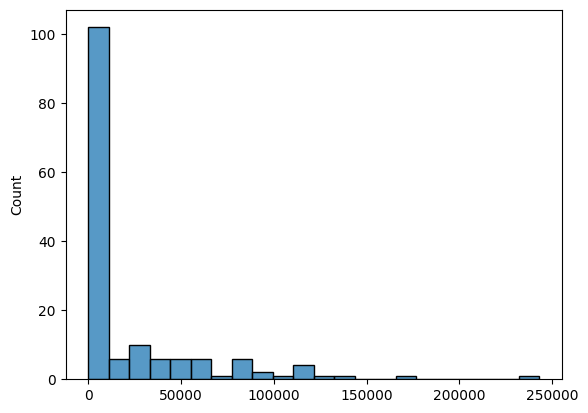

In [36]:
sns.histplot(length_arr)